# Part I - Students Skill/Performance Analysis
## by Jessica Chizoba Nkwa

## Introduction
PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings

filterwarnings('ignore')
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Dict of all the needed columns
colnames = {
    "STIDSTD": "student_id",
    "NC": "country",
    "ST04Q01": "gender",
    "ST05Q01": "pri_sch",
    "ST06Q01": "age_at_pri_sch",
    "ST01Q01": "intl_grade",
    "ST08Q01": "late_for_school",
    "ST09Q01": "skip_day",
    "ST115Q01": "skip_class",
    "ST26Q02": "possess_room",
    "ST26Q03": "possess_study_place",
    "ST26Q04": "possess_computer",
    "ST26Q06": "possess_internet",
    "ST26Q10": "possess_textbook",
    "ST29Q06": "math_interest",
    "ST42Q01": "math_anxiety",
    "MATBEH": "math_behaviour",
    "PV1MATH": "math_score",
    "PV1READ": "read_score",
    "PV1SCIE": "science_score",
    "ST44Q03": "failure_attr",
    "ST13Q01": "mother_sch_level",
    "ST17Q01": "father_sch_level",
    "ST15Q01": "mother_job_status",
    "ST19Q01": "father_job_status",
    "TCHBEHFA": "teacher_behaviour",
    "TEACHSUP": "teacher_support",
    "BFMJ2": "father_earning_pct",
    "BMMJ1": "mother_earning_pct"
}

In [3]:
# Loading the dataset
df = pd.read_csv('pisa2012.csv', encoding='ANSI', nrows=2e5, usecols=colnames.keys(), low_memory=False)

In [4]:
# Exploring the columns and rows of pisa dataset
df.shape

(200000, 29)

In [5]:
# Top 5 rows of the dataset
df.head()

,NC,STIDSTD,ST01Q01,ST04Q01,ST05Q01,ST06Q01,ST08Q01,ST09Q01,ST115Q01,ST13Q01,...,ST42Q01,ST44Q03,BFMJ2,BMMJ1,MATBEH,TCHBEHFA,TEACHSUP,PV1MATH,PV1READ,PV1SCIE
0,Albania,1,10,Female,No,6.0,None,None,1.0,<ISCED level 3A>,...,Agree,Slightly likely,76.49,79.74,0.6426,1.3625,1.68,406.8469,249.5762,341.7009
1,Albania,2,10,Female,"Yes, for more than one year",7.0,One or two times,None,1.0,<ISCED level 3A>,...,NaN,Slightly likely,15.35,23.47,1.4702,NaN,NaN,486.1427,406.2936,548.9929
2,Albania,3,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",...,NaN,Likely,22.57,NaN,0.9618,NaN,NaN,533.2684,401.2100,499.6643
3,Albania,4,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",...,NaN,NaN,14.21,NaN,NaN,0.7644,1.68,412.2215,547.3630,438.6796
4,Albania,5,9,Female,"Yes, for more than one year",6.0,One or two times,None,2.0,She did not complete <ISCED level 1>,...,Strongly agree,Likely,80.92,NaN,1.8169,0.7644,0.11,381.9209,311.7707,361.5628


In [6]:
# Manually inspecting the dataset for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NC        200000 non-null  object 
 1   STIDSTD   200000 non-null  int64  
 2   ST01Q01   200000 non-null  int64  
 3   ST04Q01   200000 non-null  object 
 4   ST05Q01   194537 non-null  object 
 5   ST06Q01   184727 non-null  float64
 6   ST08Q01   196367 non-null  object 
 7   ST09Q01   196385 non-null  object 
 8   ST115Q01  196481 non-null  float64
 9   ST13Q01   186541 non-null  object 
 10  ST15Q01   191405 non-null  object 
 11  ST17Q01   179712 non-null  object 
 12  ST19Q01   184470 non-null  object 
 13  ST26Q02   194627 non-null  object 
 14  ST26Q03   193172 non-null  object 
 15  ST26Q04   194277 non-null  object 
 16  ST26Q06   194110 non-null  object 
 17  ST26Q10   192970 non-null  object 
 18  ST29Q06   128594 non-null  object 
 19  ST42Q01   127967 non-null  object 
 20  ST44

### What is the structure of your dataset?

> The pisa dataset contains 200,000 sample of the dataset with 29 columns comprising of categorical features. The features are of variety of format such as continuous, nominal, discrete, ordinal, text and categorical features

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the pisa data set are student data and academic session performance, teachers contribution and support and finally, parents career status and academic achievements.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are so many features that will support my investigations but i have to rename the columns for esy identification and analysis
Student information and score in academic session

1. Country (NC)
2. Student ID (STIDSTD)
3. International Grade (ST01Q01)
4. Gender (ST04Q01)
5. Attended Primary Education (ST05Q01)
6. Age at ISCED 1 (ST06Q01)
7. Truancy - Late for School (ST08Q01)
8. Truancy - Skip whole school day (ST09Q01)
9. Truancy - Skip classes within school day (ST115Q01)
10. Possessions - own room (ST26Q02)
11. Possessions - study place (ST26Q03)
12. Possessions - computer (ST26Q04)
13. Possessions - Internet (ST26Q06)
14. Possessions - textbooks (ST26Q10)
15. Math Interest - Interested (ST29Q06)
16. Math Anxiety - Worry That It Will Be Difficult (ST42Q01)
17. Mathematics Behaviour (MATBEH)
18. Mathematics Exam score (PV1MATH)
19. Reading Exam score (PV1READ)
20. Science Exam score (PV1SCIE)
21. Attributions to Failure - Teacher Did Not Explain Well (ST44Q03)

> Parent schooling information and career status

1. Mother [Highest Schooling level] (ST13Q01)
2. Father [Highest Schooling level] (ST17Q01)
3. Mother Current Job Status (ST15Q01)
4. Father Current Job Status (ST19Q01)
5. Father Occupation Status (BFMJ2)
6. Mother Occupation Status (BMMJ1)
7. Teacher contribution and support
8. Teacher Behaviour (TCHBEHFA)
9. Teacher Support (TEACHSUP)

## Univariate Exploration

> In this section, pisa dataset distributions of individual variables. 





In [7]:
# Rename the columns to an appropriate name
df.rename(columns=colnames, inplace=True)

In [8]:
# Viewing 4 rows of the sliced columns
df.loc[:3, :'mother_earning_pct']

,country,student_id,intl_grade,gender,pri_sch,age_at_pri_sch,late_for_school,skip_day,skip_class,mother_sch_level,...,possess_room,possess_study_place,possess_computer,possess_internet,possess_textbook,math_interest,math_anxiety,failure_attr,father_earning_pct,mother_earning_pct
0,Albania,1,10,Female,No,6.0,None,None,1.0,<ISCED level 3A>,...,No,Yes,No,No,Yes,Agree,Agree,Slightly likely,76.49,79.74
1,Albania,2,10,Female,"Yes, for more than one year",7.0,One or two times,None,1.0,<ISCED level 3A>,...,Yes,Yes,Yes,Yes,Yes,Agree,NaN,Slightly likely,15.35,23.47
2,Albania,3,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",...,Yes,Yes,Yes,Yes,Yes,Strongly agree,NaN,Likely,22.57,NaN
3,Albania,4,9,Female,"Yes, for more than one year",6.0,None,None,1.0,"<ISCED level 3B, 3C>",...,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,14.21,NaN


## Wrangling

In [9]:
# Accessing pisa dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              200000 non-null  object 
 1   student_id           200000 non-null  int64  
 2   intl_grade           200000 non-null  int64  
 3   gender               200000 non-null  object 
 4   pri_sch              194537 non-null  object 
 5   age_at_pri_sch       184727 non-null  float64
 6   late_for_school      196367 non-null  object 
 7   skip_day             196385 non-null  object 
 8   skip_class           196481 non-null  float64
 9   mother_sch_level     186541 non-null  object 
 10  mother_job_status    191405 non-null  object 
 11  father_sch_level     179712 non-null  object 
 12  father_job_status    184470 non-null  object 
 13  possess_room         194627 non-null  object 
 14  possess_study_place  193172 non-null  object 
 15  possess_computer 

## Problem

Student id is integer instead of string

# Code

In [10]:
# Change the student id type to a string
df['student_id'] = df['student_id'].astype('str')

# Test

In [11]:
# Inspect student id type changed
df['student_id'].dtype

dtype('O')

## Inspect dataset for duplicate

In [12]:
# Checking for duplicates in the pisa dataset
df.duplicated().sum()

0

## Observation

> Data has no duplicate

Checking for unique items in 'skipped days in a week'

In [13]:
df['skip_day'].unique()

array(['None  ', nan, 'One or two times  ', 'Three or four times  ',
       'Five or more times  '], dtype=object)

## Observation

There are some spaces which needs to be fixed and "nan' should be replaced with None for consistency.

## Code

In [14]:
# Replacing nan values with none
df['skip_day'] = df['skip_day'].fillna('None')

In [15]:
# Filling the spaces in skip_day column
df['skip_day'] = df['skip_day'].str.strip()

In [16]:
# Testing the code ran
df['skip_day'].unique()

array(['None', 'One or two times', 'Three or four times',
       'Five or more times'], dtype=object)

Checking for unique items in 'country'

In [17]:
df['country'].unique()

array(['Albania', 'United Arab Emirates ', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria ', 'Brazil ', 'Canada ',
       'Switzerland', 'Chile', 'Colombia ', 'Costa Rica ',
       'Czech Republic ', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France ', 'United Kingdom (excl.Scotland) ',
       'United Kingdom (Scotland)'], dtype=object)

# Observation

Some countries have leading and lagging spaces

In [18]:
# Filling the leading and lagging spaces
df['country'] = df['country'].str.strip()

In [19]:
# Testing the code ran
df['country'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom (excl.Scotland)', 'United Kingdom (Scotland)'],
      dtype=object)

Checking for unique item in parents job status 

In [20]:
df['mother_job_status'].unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

## Observation
Job status also has some spaces which needs to be removed and status should be in ordinal category.

## Define
To order columns categorically

In [21]:
def order_cat(columns: list, order: list =None):
    """Order all columns in the dataset in hierarchy"""
    if not order:
        order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
    for col in columns:
        df[col] = pd.Categorical(df[col], categories=order, ordered=True)

In [22]:
job_status = ['mother_job_status', 'father_job_status']
for jobs in job_status:
    df[jobs] = df[jobs].str.strip()

In [23]:
order_cat(job_status, order=['Not working, but looking for a job', 
                            'Other (e.g. home duties, retired)', 'Working part-time <for pay>', 
                            'Working full-time <for pay>'])

Checking for unique items in primary school education

In [24]:
df['pri_sch'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

The primary school education has some spaces which needs to be removed and should be in ordinal category

In [25]:
# Filling the spaces
df['pri_sch'] = df['pri_sch'].str.strip()

In [26]:
# Testing the code
df['pri_sch'].unique()

array(['No', 'Yes, for more than one year', 'Yes, for one year or less',
       nan], dtype=object)

In [27]:
# Setting pri_sch in order
order_cat(['pri_sch'], 
            order=['No', 'Yes, for one year or less', 'Yes, for more than one year'])

In [28]:
# Testing the code
df['pri_sch'].dtype

CategoricalDtype(categories=['No', 'Yes, for one year or less',
                  'Yes, for more than one year'],
, ordered=True)

Fixing spaces and ordering Parent School Level

In [29]:
# Parent school level columns
p_schlevel_cols = ['mother_sch_level', 'father_sch_level']

parent_level = df[p_schlevel_cols]

In [30]:
# Inspecting first 5 data set
parent_level.head()

,mother_sch_level,father_sch_level
0,<ISCED level 3A>,<ISCED level 3A>
1,<ISCED level 3A>,<ISCED level 3A>
2,"<ISCED level 3B, 3C>",<ISCED level 3A>
3,"<ISCED level 3B, 3C>",<ISCED level 3A>
4,She did not complete <ISCED level 1>,"<ISCED level 3B, 3C>"


In [31]:
def unique_psch():
    for col in p_schlevel_cols:
        print(f'{col}: ', df[col].unique(), end="\n\n")

unique_psch()

mother_sch_level:  ['<ISCED level 3A> ' '<ISCED level 3B, 3C> '
 'She did not complete <ISCED level 1> ' '<ISCED level 2> '
 '<ISCED level 1> ' nan]

father_sch_level:  ['<ISCED level 3A> ' '<ISCED level 3B, 3C> ' '<ISCED level 2> '
 'He did not complete <ISCED level 1> ' nan '<ISCED level 1> ']



In [32]:
def sol_parent_sch_level():
    """Fix all redundant characters in parent school level columns"""
    for col in parent_level.columns:
        # Fill up spaces
        df.loc[:, col] = parent_level[col].str.strip()
        # fixing redundant characters on school level
        plevel = df[col].str.extract(r'^<(.*)>$|(.*)')
        df[col] = plevel.apply(lambda cols: 
                                            cols[1] if cols[0] is np.nan
                                                    else cols[0], axis=1)

In [33]:
def order_cat(columns: list, order: list =None):
    "Order columns scale in an orderly manner"
    if not order:
        order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
    for col in columns:
        df[col] = pd.Categorical(df[col], categories=order, ordered=True)

In [34]:
sch_level = ['She did not complete <ISCED level 1>','He did not complete <ISCED level 1>']
for col, level in zip(p_schlevel_cols, sch_level):
    order_cat([col], order=[level,'ISCED level 1', 'ISCED level 2',
                                    'ISCED level 3A', 'ISCED level 3B, 3C'])

In [35]:
# Inspecting the order call
for i, col in enumerate(p_schlevel_cols):
    print(f'{col}: ', df[p_schlevel_cols[i]].dtype, end="\n\n")

mother_sch_level:  category

father_sch_level:  category



Inspecting the whole pisa dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   country              200000 non-null  object  
 1   student_id           200000 non-null  object  
 2   intl_grade           200000 non-null  int64   
 3   gender               200000 non-null  object  
 4   pri_sch              194537 non-null  category
 5   age_at_pri_sch       184727 non-null  float64 
 6   late_for_school      196367 non-null  object  
 7   skip_day             200000 non-null  object  
 8   skip_class           196481 non-null  float64 
 9   mother_sch_level     0 non-null       category
 10  mother_job_status    191405 non-null  category
 11  father_sch_level     0 non-null       category
 12  father_job_status    184470 non-null  category
 13  possess_room         194627 non-null  object  
 14  possess_study_place  193172 non-null  object  
 15  

In [37]:
# Checking the statistical dataset
df.describe()

,intl_grade,age_at_pri_sch,skip_class,father_earning_pct,mother_earning_pct,math_behaviour,teacher_behaviour,teacher_support,math_score,read_score,science_score
count,200000.000000,184727.000000,196481.000000,169195.000000,157717.000000,128231.000000,128395.000000,129264.000000,200000.000000,200000.000000,200000.000000
mean,9.724060,6.053138,1.254223,43.876301,45.086883,0.137802,0.140403,0.180976,471.075796,474.879066,480.629329
std,2.229471,1.186729,0.573415,21.884619,21.995521,1.030937,1.030047,1.003438,101.449512,102.002925,101.774531
min,7.000000,4.000000,1.000000,11.010000,11.010000,-2.140200,-2.391900,-2.920000,19.792800,0.083400,6.844500
25%,9.000000,5.000000,1.000000,25.710000,25.040000,-0.456700,-0.594500,-0.470000,397.655400,407.008400,409.399500
50%,10.000000,6.000000,1.000000,36.350000,43.330000,0.217100,0.250900,0.110000,470.252400,479.131800,481.853800
75%,10.000000,7.000000,1.000000,65.010000,65.420000,0.811000,0.764400,0.970000,543.316700,546.908300,553.002600
max,96.000000,16.000000,4.000000,88.960000,88.960000,4.424900,2.629500,1.680000,896.798600,875.705800,845.897100


Saving the processed data

In [38]:
df.to_csv('clean_pisa_data.csv')

In [39]:
df.head()

,country,student_id,intl_grade,gender,pri_sch,age_at_pri_sch,late_for_school,skip_day,skip_class,mother_sch_level,...,math_anxiety,failure_attr,father_earning_pct,mother_earning_pct,math_behaviour,teacher_behaviour,teacher_support,math_score,read_score,science_score
0,Albania,1,10,Female,No,6.0,None,None,1.0,NaN,...,Agree,Slightly likely,76.49,79.74,0.6426,1.3625,1.68,406.8469,249.5762,341.7009
1,Albania,2,10,Female,"Yes, for more than one year",7.0,One or two times,None,1.0,NaN,...,NaN,Slightly likely,15.35,23.47,1.4702,NaN,NaN,486.1427,406.2936,548.9929
2,Albania,3,9,Female,"Yes, for more than one year",6.0,None,None,1.0,NaN,...,NaN,Likely,22.57,NaN,0.9618,NaN,NaN,533.2684,401.2100,499.6643
3,Albania,4,9,Female,"Yes, for more than one year",6.0,None,None,1.0,NaN,...,NaN,NaN,14.21,NaN,NaN,0.7644,1.68,412.2215,547.3630,438.6796
4,Albania,5,9,Female,"Yes, for more than one year",6.0,One or two times,None,2.0,NaN,...,Strongly agree,Likely,80.92,NaN,1.8169,0.7644,0.11,381.9209,311.7707,361.5628


## Most common country 

Which country has the highest number of students that filled out the survey?

In [40]:
from typing import Iterable

def count_dplot(cols: Iterable, plottype: sb=sb.countplot, nrows: int=1, ncols=2, usex: bool=True,
                 figsize: tuple=(16, 7), annotr=0, tick_angle=90):
    """
        This function will plot the number of occurences in the given columns using count chart and annotate each bar
        using k to represent thousand.
        The number of the subplots rows is default to 1 while columns is 2, this can be modified using the nrows and ncols attributes.
        usex is default to True and can be represented vertically or horizontally.
    """
    base_color = sb.color_palette()[0]
    fig, ax = plt.subplots(figsize=figsize)
    if usex:
        for i, x in enumerate(cols, 1):
            countv = df[x].value_counts()
            # subplots
            plt.subplot(nrows, ncols, i)
            # Plot chart
            g = plottype(data=df, x=x, color=base_color, order=countv.index) 
            # Capitalizing and bolding the xlabel
            plt.xlabel(g.get_xlabel().replace("_", " ").title(), fontweight='bold') 
            # Rotating xticks
            locs, labels = plt.xticks(rotation=tick_angle) 
            for loc, label in zip(locs, labels):
                # Get the count of each label
                count = countv[label.get_text()] 
                plt.text(loc, count+6e2, f'{round(count/1000, 1)}k',
                         # Annotate each bar with their count using k to denote 1000
                         ha='center', color='black', rotation=annotr) 
            g.set_yticks([])
            for a in ('right', 'left', 'top'):
                # Turn off the chosen spines
                g.spines[a].set_visible(False)
                # To avoid subplot overlapping
        plt.tight_layout() 
    else:
        g = plottype(data=df, y=cols, color=base_color, ax=ax)
        # Annotate all bars
        ax.bar_label(ax.containers[0], label_type='edge', rotation=annotr) 
        

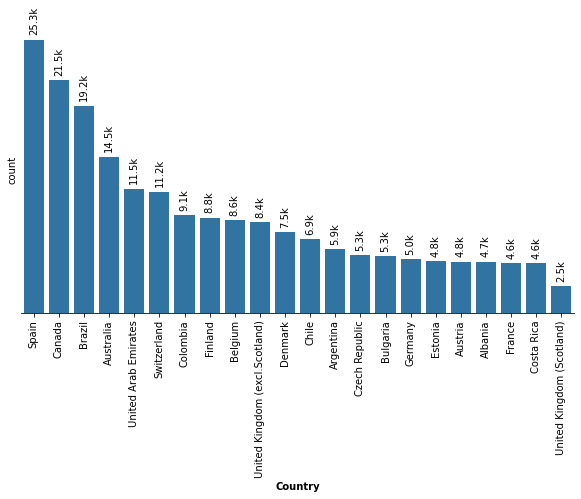

In [41]:
count_dplot(['country'], annotr=90)

## Observation

It is evident that most of the survey data's were received from students who hails from Spain, Canada and Brazil.

## Primary Education
How many years did it take for students to finish their primary education? Are primary education gotten when they students are young?  What was the age of the majority of students as at the time of survey?

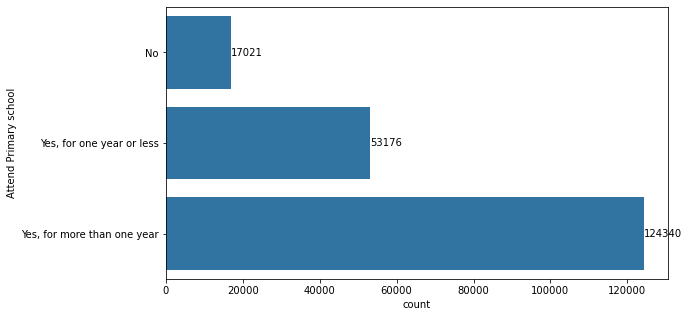

In [42]:
count_dplot('pri_sch', usex=False, figsize=(9, 5))
plt.ylabel('Attend Primary school');

## Observation
From the horizontal bar, majority of the students attended primary school for more than one year.

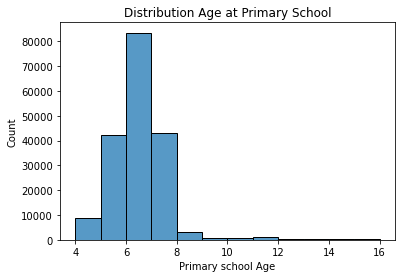

In [43]:
bin_size = np.arange(4, 17, 1)
g = sb.histplot(data=df, x='age_at_pri_sch', bins=bin_size)
g.set_xlabel('Primary school Age')
g.set_title('Distribution Age at Primary School');

## Observation
The age of most students during their primary education falls predominantly between 7 - 8 age bracket.

## Parent Job Status

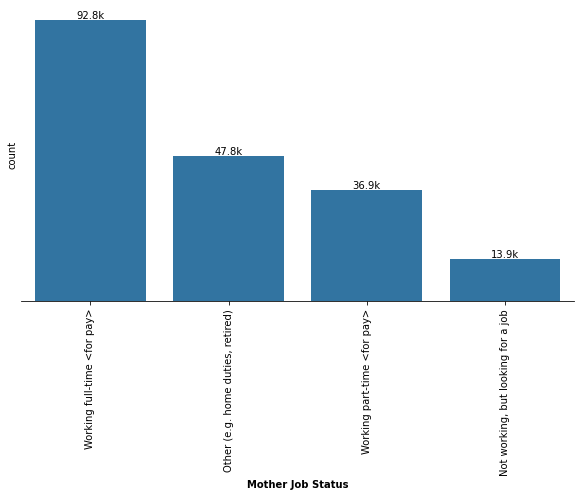

In [44]:
count_dplot(['mother_job_status'])

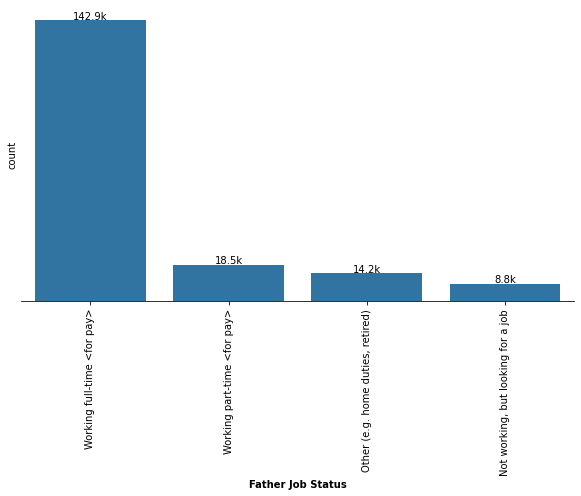

In [45]:
count_dplot(['father_job_status'])

## Observation
This shows that most of the fathers were working full-time for pay than the mothers.

## Overview of Parents earning (Pct)

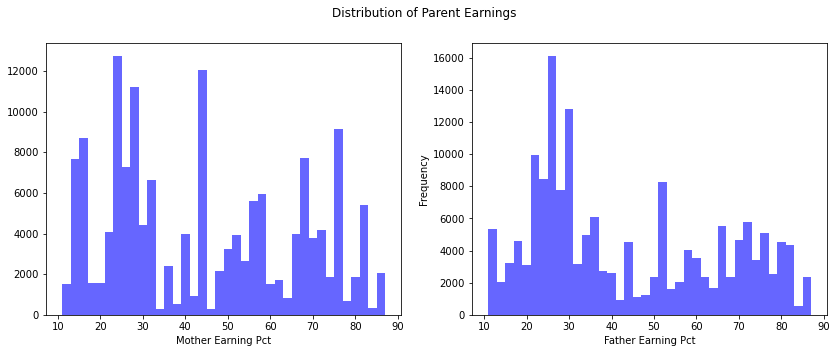

In [46]:
bins = np.arange(11, 89, 2)
plt.figure(figsize= (14, 5))
for k, col in enumerate(['mother_earning_pct', 'father_earning_pct'], 1):
    plt.subplot(1, 2, k)
    plt.hist(df[col], bins=bins, color='b', alpha=0.6)
    plt.xlabel(col.replace("_", " ").title())
plt.ylabel('Frequency')
plt.suptitle('Distribution of Parent Earnings');

This is evenly ditributed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Students who filled out the survey mostly came from Spain, Canada, and Brazil, etal. 

> Almost half of the students in this study have parents with more than one college degree.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> Parental earnings (Pct) distribution has no clear shape or pattern.

> Imperative Pisa dataset were extracted and cleaned.

> Most variables were converted to ordinal categorical variables. 




## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Academic performance on primary education

In [47]:
def primary_edu_plot(x):
    sb.violinplot(data=df, y='pri_sch', x=x, inner='quartile', palette='Greens')
    plt.ylabel('Attend Primary Education');
    plt.xlabel(x.replace('_', " ").title())

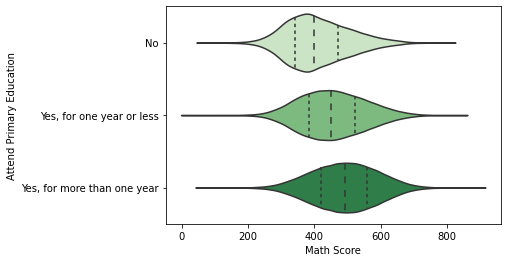

In [48]:
primary_edu_plot('math_score')

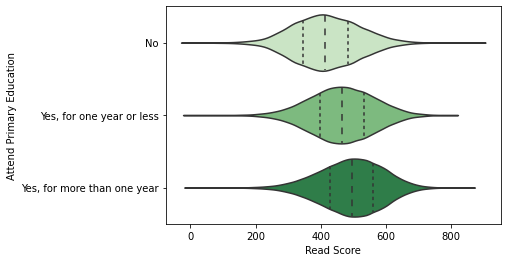

In [49]:
primary_edu_plot('read_score')

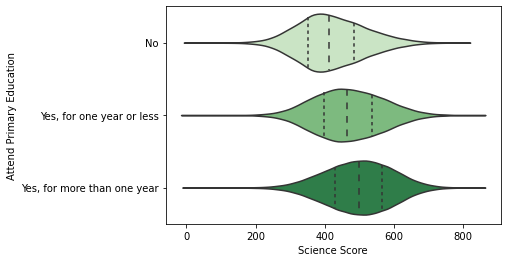

In [50]:
primary_edu_plot('science_score')

Significantly there's an increase in the scores of students based on their primary education. Primary education contributes immensely to the performance of students in mathematics, read ans science scores.

Early education impose

In [51]:
plt.style.use('seaborn')
def age_influence_plot(score, p='Blues_r'):
    fig, ax = plt.subplots(figsize=(15, 6))
    sb.boxenplot(data=df, x='age_at_pri_sch', y=score, palette=p, ax=ax)
    plt.xlabel('Primary School Age')
    plt.ylabel(score.replace('_', " ").title())
    plt.title("Early education impose on Education")

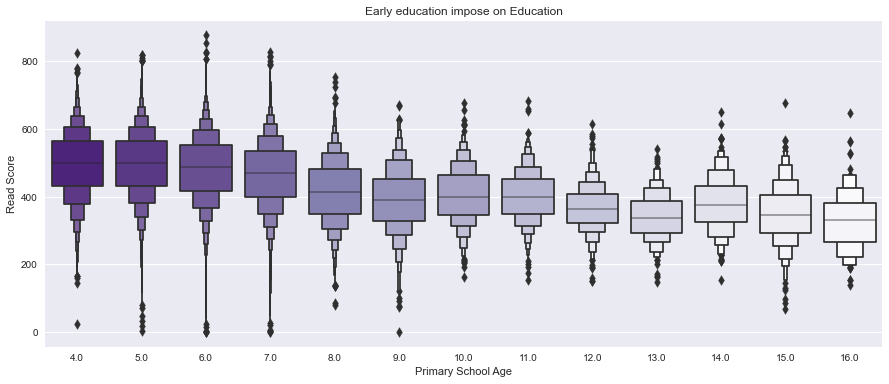

In [52]:
age_influence_plot('read_score', p='Purples_r')

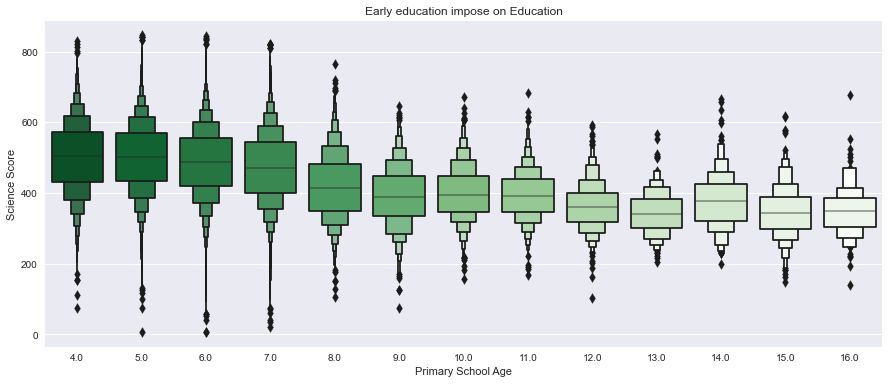

In [53]:
age_influence_plot('science_score', p='Greens_r')

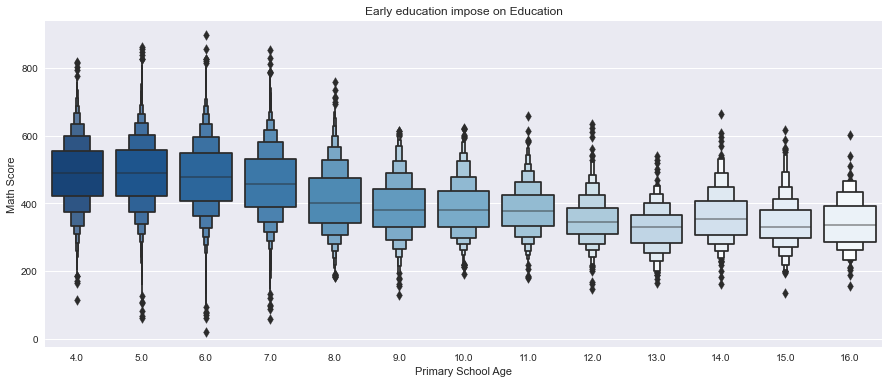

In [54]:
age_influence_plot('math_score')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> Primary education contributes excellently to the performance of students in their academics, i.e., primary education is related to high academic performance.
> The age at which students start their primary education has a great influence on their academic performance, i.e., primary education age is related to student academic performance.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Insight in view

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

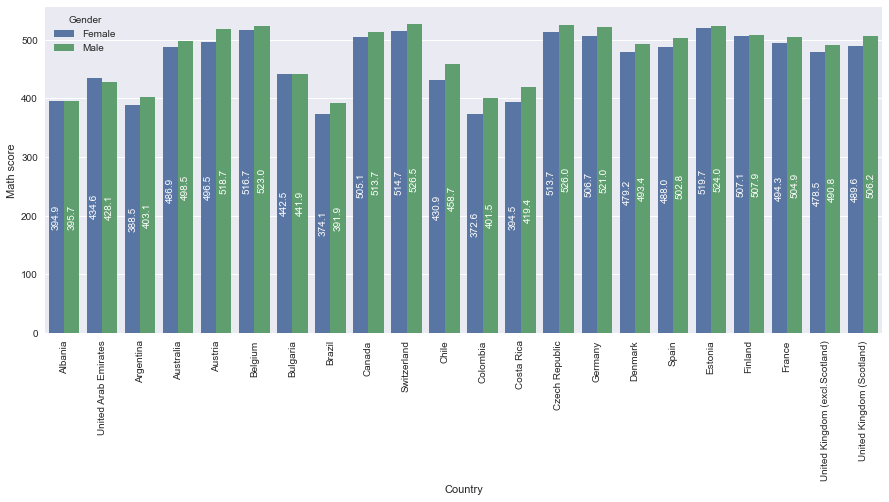

In [55]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sb.barplot(data=df, y='math_score', x='country', errwidth=0, hue='gender')
ax.bar_label(ax.containers[0], rotation=90, fmt='%.1f', label_type='center', color='white')
ax.bar_label(ax.containers[1], rotation=90, fmt='%.1f', label_type='center', color='white')
g.set(xlabel="Country", ylabel="Math score")
plt.xticks(rotation=90)
plt.legend(title='Gender');

Relationship between all numeric data

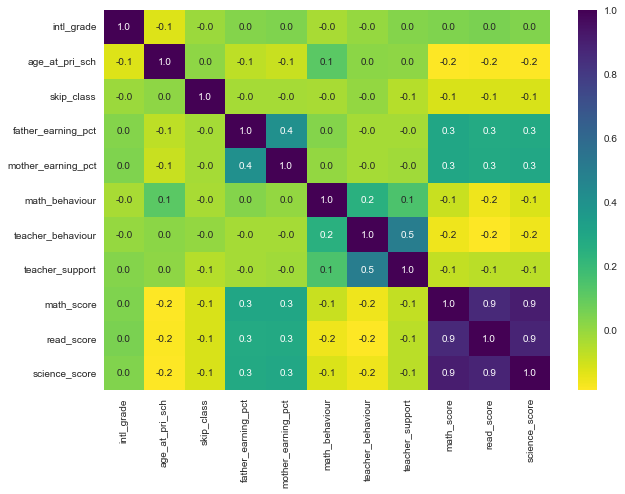

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))
sb.heatmap(df.corr(), cmap='viridis_r', annot=True, fmt='.1f', ax=ax);

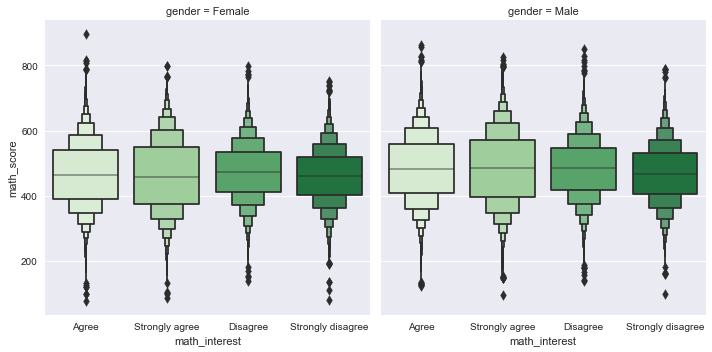

In [57]:
g = sb.FacetGrid(data=df, col='gender', aspect=1, height=5)
g.map(sb.boxenplot, 'math_interest', 'math_score', palette='Greens');

## Effect of Student Performance on Parental Employment Status 
Students with job seeking parent have to perform quite little as compared to those with full-time jobs?. It is safe to say parent occupation is related to student performance.

In [58]:
def parent_emp_inf():
    """
        Student performance determining the Parent employment status 
    """
    fig, axis = plt.subplots(nrows=2, figsize=(7, 9))
    g = sb.violinplot(data=df, y='father_job_status', x='math_score', inner='quartile', palette='Blues', ax=axis[0])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

    g = sb.boxenplot(data=df, y='mother_job_status', x='read_score', palette='Greens', ax=axis[1])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())
    plt.suptitle('Effect of Parental Job status on Students performance')

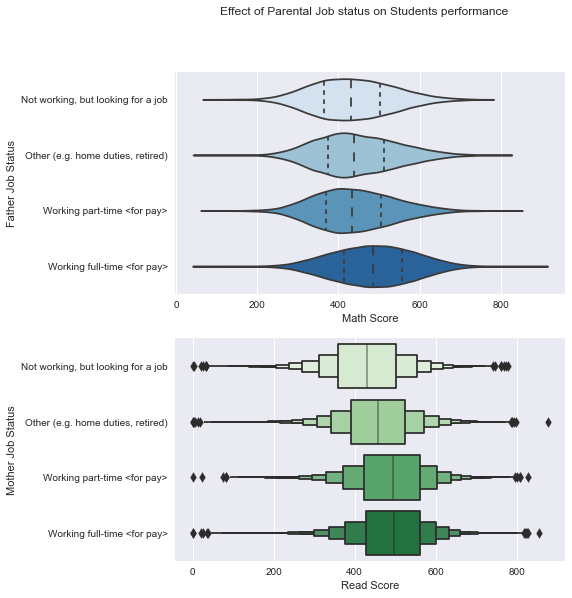

In [59]:
parent_emp_inf()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a relationship between the student's study interest and the examination score.
> The parent's earnings have a slight relationship with the student's examination score.

### Were there any interesting or surprising interactions between features?

> Both parents' earnings are correlated with confidence interval.
> Teacher support would be correlated with student examination scores, but they are not correlated.

## Conclusions
> When student's basic school foundation is strong, their performance will always be exceptionally high. The study has contributed to the confirmation that children perform better academically when they start up schooling. 
